# 5-ADNI_Segment_processing - entorhinal

In [2]:
import os  # needed navigate the system to get the input data
import glob

import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
%matplotlib inline

import numpy as np
import pandas as pd
#import six

import nibabel as nib

In [46]:
#constants
PATH_SCANS = "/notebooks/disk2/DS2_FreeSurfer/"
#PATH_SCANS = "/notebooks/disk2/Paulo_MCI_AD/DS2_FreeSurfer/"

# Additonally, store the location of the example parameter file, stored in \pyradiomics\bin
#PATH_PARAM = os.path.join(os.getcwd(), "..", "Params.yaml")
PATH_PARAM = "params.yaml"
print("Parameter file, absolute path:", os.path.abspath(PATH_PARAM))

PATH_CSV_FREESURFER_FILES = 'paths_entorhinal.csv'
#PATH_CSV_FREESURFER_FILES = 'paths_freesurfer_valves2.csv'
PATH_CSV_RADIOMICS_ALL = 'D1.all_radiomics_entorhinal.csv'

Parameter file, absolute path: /notebooks/disk2/params.yaml


### Setting up data

In [25]:
# Get the paths ".mgz"

paths = {}
def percorrePasta(pasta, barrasIniciais):
    if barrasIniciais == 0:
        barrasIniciais = len(pasta.split("/"))-1
    files = []
    for f in glob.glob(pasta):
        if(os.path.isdir(f + "/")):
            f = f + "/*"
            files += percorrePasta(f, barrasIniciais)
        else:
            if(os.path.splitext(f)[1] == ".mgz" ):
                nomeFicheiro = f.split("/")[2+barrasIniciais]
                numeroPaciente = f.split("/")[barrasIniciais][5:15]
                if nomeFicheiro == "aparc+aseg.mgz" or nomeFicheiro == "brain.mgz" :
                    if numeroPaciente not in paths:
                        paths[numeroPaciente] = {"aparc+aseg": "", "brain": "", "hipocampo": "", "diretorio": ""}
                    paths[numeroPaciente][nomeFicheiro.replace(".mgz", "")] = f
                    paths[numeroPaciente]["diretorio"] = f.replace(nomeFicheiro, "")
                    
                        
    return paths

percorrePasta("/notebooks/disk2/DS2_FreeSurfer/*", 0) #paths já está alterado
#percorrePasta("/notebooks/disk2/Paulo_MCI_AD/DS2_FreeSurfer/*", 0) #paths já está alterado

# Additonally, store the location of the example parameter file, stored in \pyradiomics\bin
#paramPath = os.path.join(os.getcwd(), "..", "Params.yaml")
paramPath = "params.yaml"
print("Parameter file, absolute path:", os.path.abspath(paramPath))


Parameter file, absolute path: /notebooks/disk2/params.yaml


In [26]:
print(paths["006_S_0681"])
print(paths["002_S_0295"])

{'aparc+aseg': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/aparc+aseg.mgz', 'brain': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/brain.mgz', 'hipocampo': '', 'diretorio': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/'}
{'aparc+aseg': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/aparc+aseg.mgz', 'brain': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/brain.mgz', 'hipocampo': '', 'diretorio': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/'}


In [ ]:
#Create files .nii.gz

#for paciente in paths:
    #brain = paths[paciente]["brain"][:-4]
    #aparcaseg = paths[paciente]["aparc+aseg"][:-4]
    #print(aparcaseg)
    #img_brain = nib.load(f"{brain}.mgz")
    #nib.save(img_brain , f"{brain}.nii.gz")
    #print("done_brain")
    
    #img_aparc_aseg = nib.load(f"{aparcaseg}.mgz")
    #nib.save(img_aparc_aseg , f"{aparcaseg}.nii.gz")
    #print("done_aparc-aseg")

In [30]:
# Get the paths ".nii.gz"

paths_nii = {}
def percorrePasta_2(pasta, barrasIniciais):
    if barrasIniciais == 0:
        barrasIniciais = len(pasta.split("/"))-1
    files = []
    for f in glob.glob(pasta):
        if(os.path.isdir(f + "/")):
            f = f + "/*"
            files += percorrePasta_2(f, barrasIniciais)
        else:
            if(os.path.splitext(f)[1] == ".gz" ):
                nomeFicheiro = f.split("/")[2+barrasIniciais]
                numeroPaciente = f.split("/")[barrasIniciais][5:15]
                if nomeFicheiro == "aparc+aseg.nii.gz" or nomeFicheiro == "brain.nii.gz" :
                    if numeroPaciente not in paths_nii:
                        paths_nii[numeroPaciente] = {"aparc+aseg": "", "brain": "", "diretorio": ""}
                    paths_nii[numeroPaciente][nomeFicheiro.replace(".nii.gz", "")] = f
                    paths_nii[numeroPaciente]["diretorio"] = f.replace(nomeFicheiro, "")
                        
    return paths_nii

percorrePasta_2(PATH_SCANS+'*', 0) #paths já está alterado
#percorrePasta("/notebooks/disk2/Paulo_MCI_AD/DS2_FreeSurfer/*", 0) #paths já está alterado
print(paths_nii["006_S_0681"])
print(paths_nii["002_S_0295"])


{'aparc+aseg': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/aparc+aseg.nii.gz', 'brain': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/brain.nii.gz', 'diretorio': '/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_0681_MR_MP-RAGE__br_raw_20060831143335593_1_S18451_I23677_generate/mri/'}
{'aparc+aseg': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/aparc+aseg.nii.gz', 'brain': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/brain.nii.gz', 'diretorio': '/notebooks/disk2/DS2_FreeSurfer/ADNI_002_S_0295_MR_MP-RAGE__br_raw_20060418193713091_1_S13408_I13722_generate/mri/'}


In [31]:
# label selection
#img = nib.load(labelPath).get_fdata()
#print(type(img))

def get_labelnp_from_mgz(labelPath, regionlist):
    nplabel = nib.load(labelPath).get_fdata()
    for reg in regionlist:
        nplabel[nplabel == reg] =-1
    nplabel[nplabel != -1] =0
    nplabel[nplabel == -1] =1
    return nplabel

#label_hp=get_labelnp_from_mgz(labelPath, [17,53])
#print(label_hp)

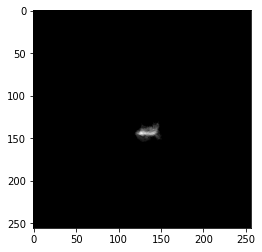

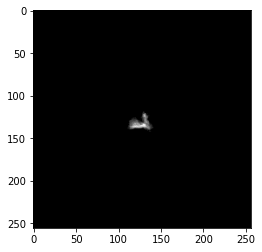

In [33]:
def display_mask(subject):
    label = get_labelnp_from_mgz(paths_nii[subject]["aparc+aseg"], [1006,2006])
    plt.imshow(np.sum((label>0).astype(float), 0), cmap="gray")
    plt.show()

display_mask("006_S_0681")
display_mask("002_S_0295")

In [36]:
# Display the images

list_subject = list(paths_nii.keys())
@interact 
def display_img_mask(subject=list_subject):
    #example ADNI_002_S_0295
    print(paths_nii[subject]["brain"]) 
    img = nib.load(paths_nii[subject]["brain"]).get_fdata()
    print(img.shape)

    print(paths_nii[subject]["aparc+aseg"]) 
    label = get_labelnp_from_mgz(paths_nii[subject]["aparc+aseg"], [1006,2006])
    print(label.shape)

    @interact
    def viewer_scan(i=(60,200)):
        plt.figure(figsize=(15,15))
        plt.subplot(2,2,1)
        plt.imshow(img[i,:,:], cmap="gray")        
        plt.title("Img")
        plt.subplot(2,2,2)
        plt.imshow(label[i,:,:])        
        plt.title("Segmentation")
        plt.show()


interactive(children=(Dropdown(description='subject', options=('006_S_0681', '941_S_1203', '011_S_0003', '057_…

In [38]:
#save paths in CSV
def create_path_freesurfer_csv(paths_dic,path_csv): 
    colunas = ["ID", "Image", "Mask"]
    df = pd.DataFrame([],columns=colunas)
    for paciente in paths_dic:
        coluna1 = paths_dic[paciente]["brain"]
        coluna2 = paths_dic[paciente]["aparc+aseg"]
        lista = [paciente, coluna1, coluna2]
        df.loc[df.shape[0]] = lista 

    df.to_csv(path_csv, index=False)

create_path_freesurfer_csv(paths_nii,PATH_CSV_FREESURFER_FILES)

### Segment Radiomics Extraction

In [39]:
#from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#import h5py # for reading the image files
#import skimage # for image processing and visualizations
#import sklearn # for machine learning and statistical models

from pathlib import Path # help manage files
from SimpleITK import GetImageFromArray
import radiomics
from radiomics import featureextractor
from radiomics.featureextractor import RadiomicsFeatureExtractor # This module is used for interaction with pyradiomic
import logging
logging.getLogger('radiomics').setLevel(logging.CRITICAL + 1)  # this tool makes a whole TON of log noise

In [40]:
extractor = featureextractor.RadiomicsFeatureExtractor(PATH_PARAM)
print('Extraction parameters:\n\t', extractor.settings)
print('Enabled filters:\n\t', extractor.enabledImagetypes)
print('Enabled features:\n\t', extractor.enabledFeatures)

Extraction parameters:
	 {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled filters:
	 {'Original': {}, 'Wavelet': {}, 'LoG': {'sigma': [1.0, 2.0, 3.0, 4.0, 5.0]}, 'Square': {}, 'SquareRoot': {}, 'Logarithm': {}, 'Exponential': {}, 'Gradient': {}, 'LBP2D': {}, 'LBP3D': {}}
Enabled features:
	 {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': [], 'shape2D': []}


In [53]:
%%time
#TEST1

def calc_radiomics(in_image_data, in_mask_data):
    return extractor.execute(GetImageFromArray(in_image_data),
                            GetImageFromArray((in_mask_data>0).astype(np.uint8)))

def calc_radiomics_files(in_image_file, in_mask_file):
    img = nib.load(in_image_file).get_fdata()
    mask = get_labelnp_from_mgz(in_mask_file, [1006,2006])
    return extractor.execute(GetImageFromArray(img),
                            GetImageFromArray((mask>0).astype(np.uint8)))

def test_rad_extration(subject):
    img = nib.load(paths_nii[subject]["brain"]).get_fdata()
    mask = get_labelnp_from_mgz(paths_nii[subject]["aparc+aseg"], [1006,2006])
    results = calc_radiomics((img,mask))
    return pd.DataFrame([results]).T

def test_rad_extration_files(subject):
    results = calc_radiomics_files(paths_nii[subject]["brain"],paths_nii[subject]["aparc+aseg"])
    return pd.DataFrame([results]).T

test_rad_extration_files("006_S_0681")

CPU times: user 45 s, sys: 17.8 s, total: 1min 2s
Wall time: 37.1 s


,0
diagnostics_Versions_PyRadiomics,2.2.0
diagnostics_Versions_Numpy,1.18.5
diagnostics_Versions_SimpleITK,1.2.4
diagnostics_Versions_PyWavelet,1.1.1
diagnostics_Versions_Python,3.7.7
...,...
lbp-3D-k_ngtdm_Busyness,144.5442739941008
lbp-3D-k_ngtdm_Coarseness,0.0042501577882001285
lbp-3D-k_ngtdm_Complexity,0.11228126093651793
lbp-3D-k_ngtdm_Contrast,0.006315239686314246


In [ ]:
%%time
#TEST2
#ERROR
test_rad_extration("941_S_1203")

In [47]:
all_df=pd.read_csv(PATH_CSV_FREESURFER_FILES)
all_df.head() # show the first lines

,ID,Image,Mask
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...


In [55]:
%%time

all_df['radiomics'] = all_df.apply(lambda row: calc_radiomics_files(row[ "Image"], row["Mask"]) ,axis = 1)

all_df.head() 

CPU times: user 5h 18min 33s, sys: 3h 25min 37s, total: 8h 44min 11s
Wall time: 5h 51min 47s


,ID,Image,Mask,radiomics
0,006_S_0681,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,/notebooks/disk2/DS2_FreeSurfer/ADNI_006_S_068...,"{'diagnostics_Versions_PyRadiomics': '2.2.0', ..."
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,"{'diagnostics_Versions_PyRadiomics': '2.2.0', ..."
2,011_S_0003,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,/notebooks/disk2/DS2_FreeSurfer/ADNI_011_S_000...,"{'diagnostics_Versions_PyRadiomics': '2.2.0', ..."
3,057_S_0779,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,/notebooks/disk2/DS2_FreeSurfer/ADNI_057_S_077...,"{'diagnostics_Versions_PyRadiomics': '2.2.0', ..."
4,033_S_0920,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_092...,"{'diagnostics_Versions_PyRadiomics': '2.2.0', ..."


In [57]:
def cria_CSV_radiomics_all(PATH_CSV_RADIOMICS_ALL,all_df):
    full_df = pd.DataFrame([dict(**c_row.pop('radiomics'), **c_row) for _, c_row in all_df.iterrows()])
    print(full_df.shape, 'data prepared')
    first_cols = all_df.columns[:-1].tolist()
    full_df = full_df[first_cols + [c_col for c_col in full_df.columns if c_col not in first_cols]]
    # export the whole table
    full_df.to_csv('D1.all_radiomics_entorhinal.csv', index=False)
    return full_df
    full_df.sample(3)

full_df=cria_CSV_radiomics_all(PATH_CSV_RADIOMICS_ALL, all_df)
full_df.sample(3)

(426, 2178) data prepared


,ID,Image,Mask,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,...,lbp-3D-k_glszm_SmallAreaHighGrayLevelEmphasis,lbp-3D-k_glszm_SmallAreaLowGrayLevelEmphasis,lbp-3D-k_glszm_ZoneEntropy,lbp-3D-k_glszm_ZonePercentage,lbp-3D-k_glszm_ZoneVariance,lbp-3D-k_ngtdm_Busyness,lbp-3D-k_ngtdm_Coarseness,lbp-3D-k_ngtdm_Complexity,lbp-3D-k_ngtdm_Contrast,lbp-3D-k_ngtdm_Strength
38,029_S_0845,/notebooks/disk2/DS2_FreeSurfer/ADNI_029_S_084...,/notebooks/disk2/DS2_FreeSurfer/ADNI_029_S_084...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,2.1098716814141043,0.15099964699943125,2.635973681866124,0.013980028530670471,110836.73885880884,73.91856267630193,0.0077226461780279055,0.07388832742831111,0.00288116096838359,0.007854267452094221
179,033_S_1283,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_128...,/notebooks/disk2/DS2_FreeSurfer/ADNI_033_S_128...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,1.920379054372609,0.12002370574846277,2.8564648567476496,0.013426573426573427,107293.62456597222,171.53207338555535,0.0038912590221832394,0.14376852228322706,0.01058830029485949,0.00404940009610911
1,941_S_1203,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,/notebooks/disk2/DS2_FreeSurfer/ADNI_941_S_120...,2.2.0,1.18.5,1.2.4,1.1.1,3.7.7,"{'minimumROIDimensions': 2, 'minimumROISize': ...","{'Original': {}, 'Wavelet': {}, 'LoG': {'sigma...",...,2.2333413480033752,0.15423228456942095,2.6120481027607694,0.019698368728839642,68991.67944335938,128.90666524797493,0.004884550861504729,0.12602469300250174,0.007873671078292746,0.004997782823645381
